In [4]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio import SeqIO
from IPython.core.display import Image

In [8]:
my_seq_feature = SeqFeature(FeatureLocation(10,200),strand=+1)

In [ ]:
gdd = GenomeDiagram.Diagram('Test Diagram')
gdt_features = gdd.new_track(1, greytrack=False)
gds_features = gdt_features.new_set()

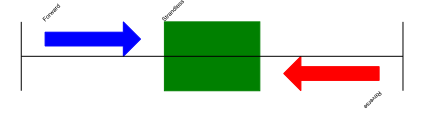

In [28]:
# Flecha azul
feature = SeqFeature(FeatureLocation(25, 125), strand=+1)
gds_features.add_feature(feature, name="Forward", sigil="ARROW",label=True, color = colors.blue)


feature = SeqFeature(FeatureLocation(150, 250), strand=None)
gds_features.add_feature(feature, name="Strandless", label=True, color = colors.green)

feature = SeqFeature(FeatureLocation(275, 375), strand=-1)
gds_features.add_feature(feature, name="Reverse",sigil="ARROW", label=True, color = colors.red)

gdd.draw(format='linear', pagesize=(15*cm,4*cm), fragments=1,
         start=0, end=400)

gdd.write("GD_labels_default.png", "png")
Image("GD_labels_default.png")